Slope (price per sq.ft): 0.02549180327868853
Intercept: -0.40163934426229986
Predicted price for 1100 sq.ft: 27.639344262295083 lakhs


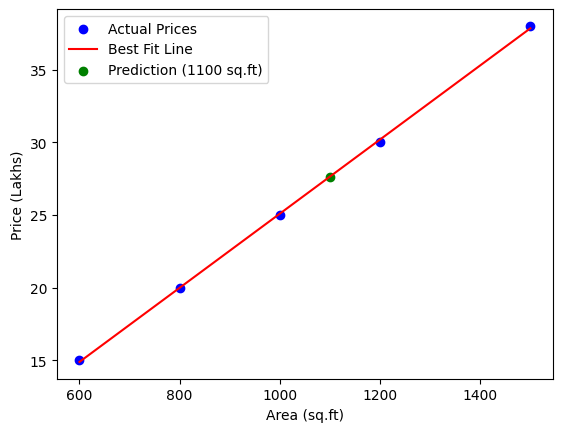

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 📊 Small dataset (area in sq.ft vs price in lakhs)
X = np.array([600, 800, 1000, 1200, 1500]).reshape(-1, 1)
y = np.array([15, 20, 25, 30, 38])

# 🔧 Train model
model = LinearRegression()
model.fit(X, y)

# 📈 Coefficients
print("Slope (price per sq.ft):", model.coef_[0])
print("Intercept:", model.intercept_)

# 🔮 Prediction for a new house
new_area = np.array([[1100]])
predicted_price = model.predict(new_area)
print("Predicted price for 1100 sq.ft:", predicted_price[0], "lakhs")

# 🎨 Plot
plt.scatter(X, y, color="blue", label="Actual Prices")
plt.plot(X, model.predict(X), color="red", label="Best Fit Line")
plt.scatter(new_area, predicted_price, color="green", label="Prediction (1100 sq.ft)")
plt.xlabel("Area (sq.ft)")
plt.ylabel("Price (Lakhs)")
plt.legend()
plt.show()


Slope (m): 7.9638939184231585
Intercept (b): 25.599999956916044
Predicted price for 1100 sq.ft: 27.639344215778976 lakhs


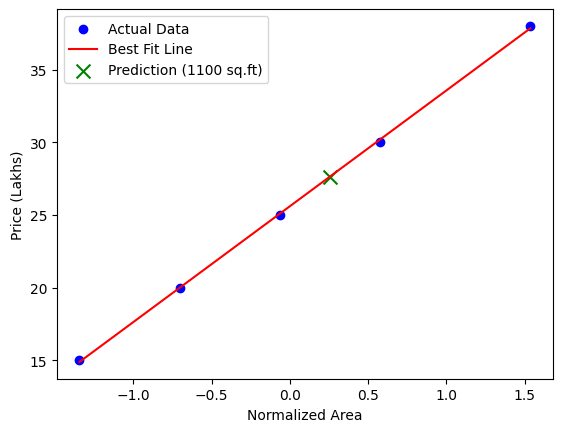

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 📊 Dataset (Area vs Price)
X_raw = np.array([600, 800, 1000, 1200, 1500], dtype=float)
y = np.array([15, 20, 25, 30, 38], dtype=float)

# Normalize X (helps gradient descent)
X = (X_raw - X_raw.mean()) / X_raw.std()

# Parameters
m, b = 0.0, 0.0
lr = 0.01
epochs = 1000
n = len(X)

# Gradient Descent
for i in range(epochs):
    y_pred = m * X + b
    error = y_pred - y

    dm = (2/n) * np.dot(error, X)
    db = (2/n) * np.sum(error)

    m -= lr * dm
    b -= lr * db

# Final model
print("Slope (m):", m)
print("Intercept (b):", b)

# 🔮 Predict for 1100 sq.ft (normalize first!)
new_area = 1100
new_x = (new_area - X_raw.mean()) / X_raw.std()
pred_price = m * new_x + b
print("Predicted price for 1100 sq.ft:", pred_price, "lakhs")

# 🎨 Plot
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, m*X + b, color="red", label="Best Fit Line")
plt.scatter(new_x, pred_price, color="green", s=100, marker="x", label="Prediction (1100 sq.ft)")
plt.xlabel("Normalized Area")
plt.ylabel("Price (Lakhs)")
plt.legend()
plt.show()


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 📊 Dataset: [Area, Bedrooms] → Price (in lakhs)
X = np.array([
    [600, 1],
    [800, 2],
    [1000, 2],
    [1200, 3],
    [1500, 3]
])
y = np.array([15, 20, 25, 30, 38])

# 🔧 Train model
model = LinearRegression()
model.fit(X, y)

# 📈 Coefficients
print("Coefficients (slopes):", model.coef_)   # [slope for area, slope for bedrooms]
print("Intercept:", model.intercept_)

# 🔮 Predict price for [1100 sq.ft, 2 bedrooms]
new_house = np.array([[1100, 2]])
pred_price = model.predict(new_house)
print("Predicted Price:", pred_price[0], "lakhs")


Coefficients (slopes): [ 0.0262 -0.32  ]
Intercept: -0.42000000000001236
Predicted Price: 27.76 lakhs


In [5]:
import numpy as np

# 📊 Dataset: [Area, Bedrooms] → Price
X = np.array([
    [600, 1],
    [800, 2],
    [1000, 2],
    [1200, 3],
    [1500, 3]
], dtype=float)
y = np.array([15, 20, 25, 30, 38], dtype=float)

# Normalize features (helps gradient descent converge faster)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias column (for intercept b)
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape (n_samples, n_features+1)

# Initialize weights (θ = [b, m1, m2])
theta = np.zeros(X_b.shape[1])

# Hyperparameters
lr = 0.01
epochs = 1000
n = len(y)

# Gradient Descent Loop
for i in range(epochs):
    y_pred = X_b.dot(theta)
    error = y_pred - y
    
    gradients = (2/n) * X_b.T.dot(error)
    theta -= lr * gradients  # update step
    
    if i % 100 == 0:
        cost = np.mean(error**2)
        print(f"Epoch {i}, Cost: {cost:.4f}, Theta: {theta}")

print("\nFinal parameters (theta):", theta)

# 🔮 Prediction for [1100 sq.ft, 2 bedrooms]
# Normalize input using same mean/std
new_house = np.array([1100, 2], dtype=float)
new_house_norm = (new_house - np.array([600, 2])) / np.array([317.82, 0.707])  # mean & std from training
new_house_b = np.r_[1, new_house_norm]  # add intercept term

pred_price = new_house_b.dot(theta)
print("Predicted Price:", pred_price, "lakhs")


Epoch 0, Cost: 718.8000, Theta: [0.512      0.15927788 0.14645916]
Epoch 100, Cost: 13.5492, Theta: [22.27284058  4.49781418  3.29685567]
Epoch 200, Cost: 1.6790, Theta: [25.1587536   5.08198403  2.86070688]
Epoch 300, Cost: 1.0944, Theta: [25.5414821   5.52154773  2.42406887]
Epoch 400, Cost: 0.8066, Theta: [25.59223938  5.89779707  2.04787735]
Epoch 500, Cost: 0.5969, Theta: [25.59897079  6.22087808  1.72479749]
Epoch 600, Cost: 0.4423, Theta: [25.59986351  6.49832439  1.4473512 ]
Epoch 700, Cost: 0.3283, Theta: [25.5999819   6.73658223  1.20909336]
Epoch 800, Cost: 0.2442, Theta: [25.5999976   6.94118688  1.00448871]
Epoch 900, Cost: 0.1822, Theta: [25.59999968  7.11689173  0.82878385]

Final parameters (theta): [25.59999996  7.26638084  0.67929475]
Predicted Price: 37.03159778056968 lakhs
